<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Principal Components Analysis

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os.path import exists

path = Path('')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'foodconsumption.csv':'https://storage.googleapis.com/aipi_datasets/foodconsumption.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

## European Food Consumption

In [3]:
# Read in the data

filepath = path/'foodconsumption.csv'
foods = pd.read_csv(filepath)
foods.set_index(keys='Country',inplace=True)
foods = foods.dropna(axis=0)

print(foods.shape)
foods

(13, 20)


,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Country,,,,,,,,,,,,,,,,,,,,
Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5
Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24
England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28
Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9
Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11


In [4]:
# Standardize each feature

# Calculate mean and stdev
mu = foods.mean(axis=0)
stdev = foods.std(axis=0)

# Calculate the standardized data
foods_standard = (foods-mu) / stdev

foods_standard.head()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Country,,,,,,,,,,,,,,,,,,,,
Germany,0.559812,0.246662,0.479353,0.194358,-0.154547,-0.039416,0.033377,1.388978,0.600111,0.572764,0.621648,0.304075,0.018564,0.622303,-0.627234,0.667536,0.511182,0.679145,0.391242,0.309975
Italy,0.232731,-1.443307,-1.182404,-1.339680,-0.247995,-0.679920,-0.738004,-1.250080,-1.268985,-1.131725,-0.137680,0.036077,-1.389225,-0.442163,1.055807,-0.551280,-1.792040,1.382642,-0.880295,-0.193734
France,0.478042,-0.056666,-1.004359,-1.159205,0.733202,0.088685,-0.352314,1.666774,-0.700130,-0.862596,0.947074,0.907072,-0.142326,-0.484742,1.287951,0.813794,-0.923612,-0.657499,1.764503,-1.138189
Holland,0.805123,0.809985,1.072838,1.367446,0.079071,0.985391,1.190449,-0.555591,-0.456335,-0.055206,0.730123,1.242070,0.702348,1.048090,-0.830360,-2.257621,0.964275,-1.466521,1.561057,-0.382625
Belgium,0.723353,-0.229996,-1.894585,-0.527543,0.639755,-0.936122,0.226222,-0.277796,-0.537600,-0.234626,0.350459,0.371075,-0.061881,0.026202,-0.424109,0.326267,0.322393,0.995719,-0.117373,-1.012262


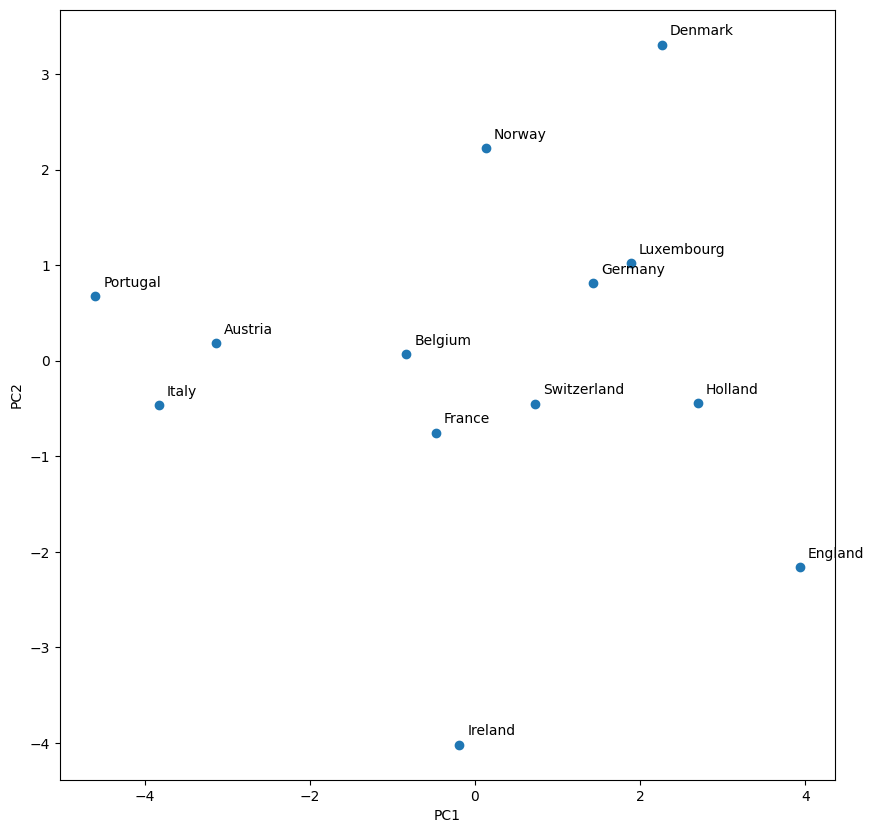

In [5]:
# PCA on the standardized data using 2 principal components for viewing
pca = PCA(2)
pca.fit(foods_standard)

# Project the data onto the new principal components axes
projected = pca.transform(foods_standard)

# Plot the data on the new principal components axes
fig2,ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(x=projected[:,0],y=projected[:,1])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
for i,country in enumerate(list(foods_standard.index.values)):
    ax2.annotate(country,xy=(projected[i,0]+0.1,projected[i,1]+0.1))
plt.show()

In [6]:
pca.components_.shape

(2, 20)

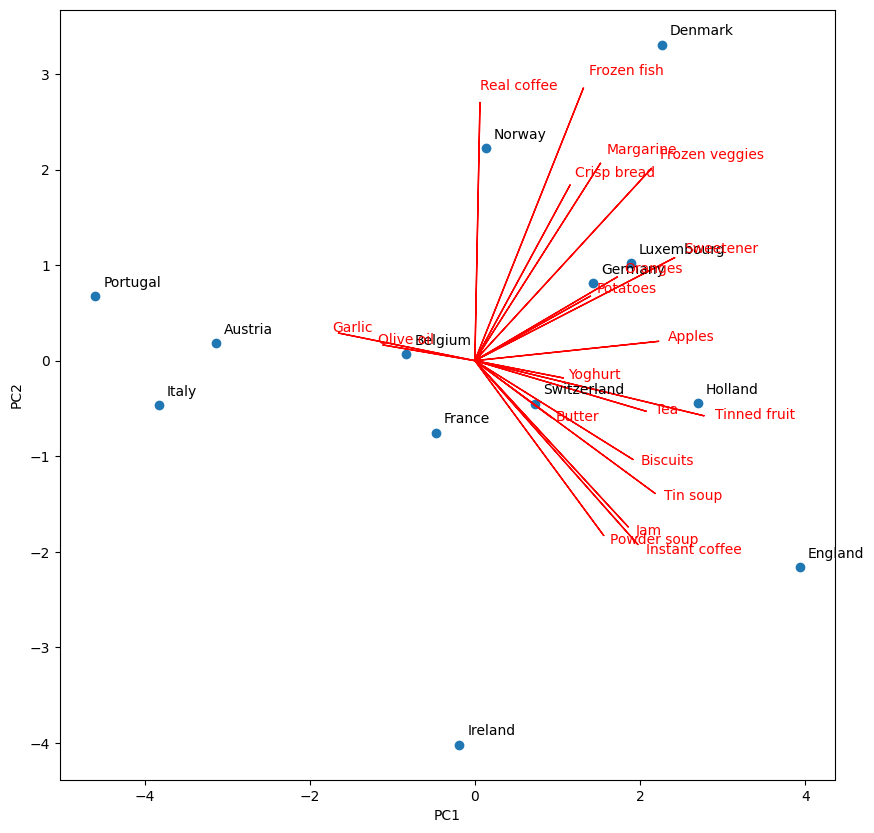

In [7]:
# Plot the data on the new principal components axes
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(x=projected[:,0],y=projected[:,1])

for i,country in enumerate(list(foods_standard.index.values)):
    ax.annotate(country,xy=(projected[i,0]+0.1,projected[i,1]+0.1))

# Also plot the components - the original features projected onto the new principal component axes
components = pca.components_.T
for i in range(components.shape[0]):
    ax.arrow(0,0,components[i,0]*np.max(projected[:,0]*2),components[i,1]*np.max(projected[:,1]*2),color='r')
    plt.annotate(foods_standard.columns.values[i],xy=(components[i,0]*np.max(projected[:,0])*2.1,components[i,1]*np.max(projected[:,1])*2.1),color='red')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

In [8]:
# Let's look deeper at how the principal components are formed
print('Multipliers of original features in PCA dimesion 0:')
print(pca.components_[0])
print()
print('Multipliers of original features in PCA dimesion 1:')
print(pca.components_[1])

Multipliers of original features in PCA dimesion 0:
[ 0.00783844  0.25088295  0.26379551  0.3075616   0.24333708  0.19829443
  0.27740544  0.17786406  0.16708899  0.27206292  0.28289229  0.219254
  0.35276092  0.2361455  -0.20987329  0.11823783  0.19339383 -0.14145774
  0.13612727  0.14655957]

Multipliers of original features in PCA dimesion 1:
[ 0.4084629  -0.29072317 -0.08012012  0.16292522 -0.15635054 -0.27659622
 -0.21002179  0.1021976   0.43127954  0.30435236  0.03059694  0.13242838
 -0.08723895 -0.26308945  0.04367603 -0.09016861  0.31240199  0.02485444
 -0.02732938  0.27792015]


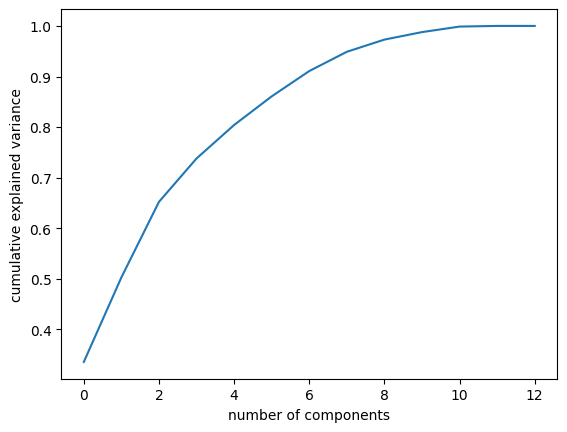

In [9]:
# Look at the amount of variance that the principal components account for
pca = PCA().fit(foods_standard)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## PCA from Scratch

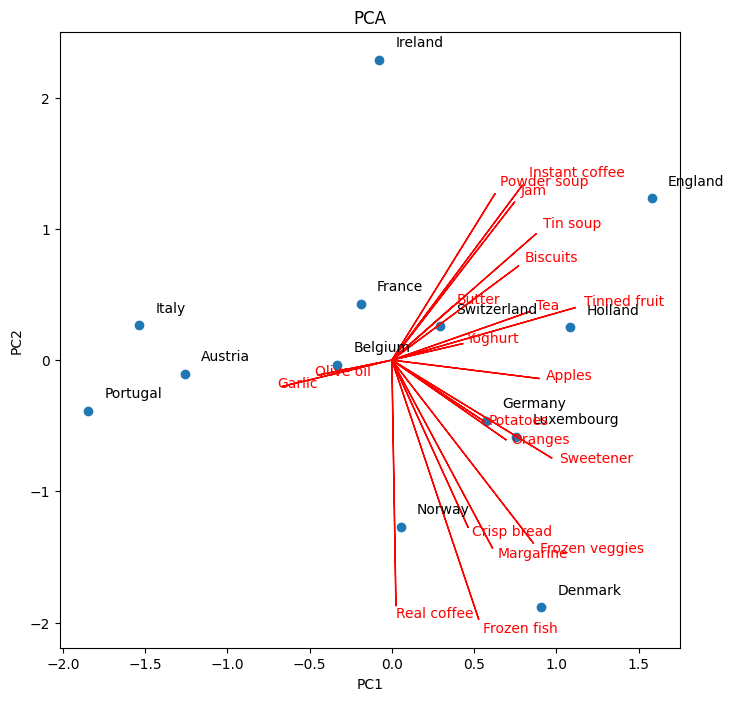

In [10]:
def pca_from_scratch(df):
    # Calculate mean and stdev
    mu = np.mean(df,axis=0)
    std = np.std(df,axis=0)

    # Calculate the standardized data
    df_standard = ((df-mu) / std).values

    # Calculate covariance of data with itself (equal to dot product since data is standardized)
    C = 1/df.shape[0]*df_standard.T.dot(df_standard)

    # Find the eigenvectors (v) and sort by largest to smallest eigenvalue (w), reduce to two with largest eigenvalues
    w,v = np.linalg.eig(C)
    order = np.argsort(w)[::-1] #Order them from largest to smallest by eigenvalue
    w_ordered = w[order]
    w_toptwo = w_ordered[:2] # Top two eigenvalues
    v_ordered = v[:,order].real
    v_toptwo = v_ordered[:,:2] # Eigenvectors corresponding to top two eigenvalues

    # Project the data points onto the principal components and normalize by the sqrt of the eigenvalues
    z_principal = df_standard.dot(v_toptwo) / np.sqrt(w_toptwo)

    # Get all of the original food vectors and scale by max value of each new principal component for visualization
    v_toptwo[:,0] = v_toptwo[:,0]*np.max(z_principal[:,0],axis=0)
    v_toptwo[:,1] = v_toptwo[:,1]*np.max(z_principal[:,1],axis=0)

    # Plot the points on the new principal components representation
    plt.figure(figsize=(8,8))
    plt.scatter(x=z_principal[:,0],y=z_principal[:,1])
    for i,val in enumerate(list(df.index.values)):
        plt.annotate(val,xy=(z_principal[i,0]+0.1,z_principal[i,1]+0.1))

    # Plot the original food vectors on the new principal components representation
    for i in range(v_toptwo.shape[0]):
        plt.arrow(0,0,v_toptwo[i,0]*2,v_toptwo[i,1]*2,color='r')
        plt.annotate(df.columns.values[i],xy=(v_toptwo[i,0]*2.1,v_toptwo[i,1]*2.1),color='red')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA')
    plt.show()
    return

pca_from_scratch(foods)

## PCA on digits

<Figure size 640x480 with 0 Axes>

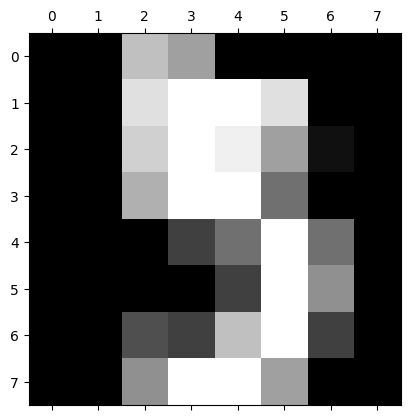

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

# Display one of the digits
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show() 

As we can see, each digit can be represented by 64 dimensions/features (x1,x2,x3 ... x64) which represent the light intensity of each pixel

In [12]:
# Looking at the shape of the data, we can verify we have 64 dimensions/features
digits.data.shape

(1797, 64)

In [13]:
# If we reshape the features to the same shape as the image pixels, we can see each one represents the pixel intensity
digits.data[5].reshape((8,8))

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

In [14]:
# Use PCA to reduce dimensions/features from 64 to 2 for visualization
pca = PCA(2)  
pca.fit(digits.data)
transformed = pca.transform(digits.data)
print('Original data shape: {}'.format(digits.data.shape))
print('New data shape: {}'.format(transformed.shape))

Original data shape: (1797, 64)
New data shape: (1797, 2)


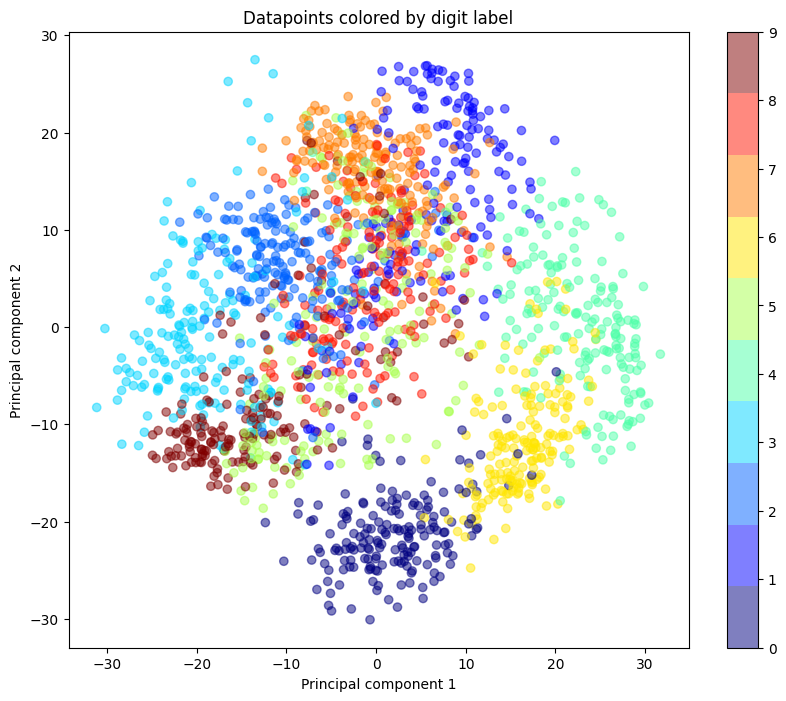

In [15]:
# Plot the transformed data on the two principal dimensions
fig = plt.figure(figsize=(10,8))
plt.scatter(transformed[:, 0], transformed[:, 1],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Datapoints colored by digit label')
plt.colorbar()
plt.show()

As shown above, the PCA has identified the optimal two dimensions which retain the maximal variation in the data while still allowing us to view the data in two dimensions.

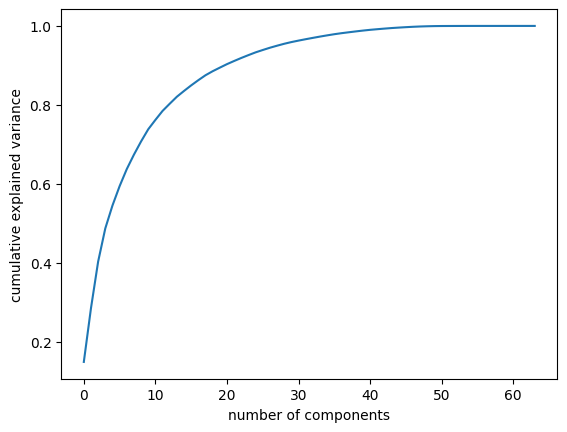

In [16]:
# Look at the amount of variance that the principal components account for
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

This curve quantifies how much of the total 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits we need about 10 components to capture 75% of the variance.